In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import statistics

In [2]:
data = np.random.normal(4, math.sqrt(8), 50)

print(data)

[ 8.72042313  4.2197604   4.08173514  2.50873651  3.66434015  4.98290528
  3.92346821  2.28071061  7.87530037  6.18506368  7.7792205   2.44779902
  1.74325537  0.33086258  1.51007129  0.16935105  0.80766864  2.27155305
  1.82969766  5.65808402  8.70147584  6.89539534 -1.00871188  8.43048564
  1.59442301  2.80386805  0.20281172  8.47553748  1.87976833  3.71465476
  5.02064609  2.75275624 -0.58674195  0.1325554   5.35438842  5.92299724
  5.54164688  2.67334306  4.8380908  -0.71224188  5.468072    6.78508604
  5.660897    5.65392358  1.02982369  4.85875142 -3.37215568  5.86725916
  5.1514464   6.16826943]


In [3]:
var = 0
mean = 0

for x in data:
    mean += x
mean = mean / len(data)

print('Mean: ' + str(mean))

for x in data:
    var += (x - mean) ** 2
var = var / len(data)

print('Variance: ' + str(var))

# p(u) = N(u|u0, sd0^2)

priorMean = 3
priorVar = 6
size = len(data)

postMean = (var / ((size * priorVar) + var)) * priorMean
postMean += ((size * priorVar) / ((size * priorVar) + var)) * mean

print('Posterior Mean: ' + str(postMean))

postVar = (1 / priorVar) + (size / var)

print('Posterior Variance: ' + str(postVar))

Mean: 3.7777705649497726
Variance: 8.082561281804354
Posterior Mean: 3.7573657155865527
Posterior Variance: 6.352824526373977


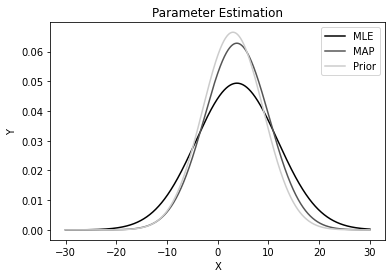

In [4]:
trueParams = np.arange(-30, 30, 0.01)
true = plt.plot(trueParams, norm.pdf(trueParams,mean,var), label = 'MLE', color = '#000')

postParams = np.arange(-30, 30, 0.01)
post = plt.plot(postParams, norm.pdf(postParams, postMean, postVar), label = 'MAP', color = '#555')

priorParams = np.arange(-30, 30, 0.01)
prior = plt.plot(priorParams, norm.pdf(priorParams, priorMean, priorVar), label = 'Prior', color = '#ccc')

plt.title('Parameter Estimation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


The MLE estimate generates a slightly higher variance than the 